### 이미지의 특징을 추출하는 오토인코더

In [2]:
#딥러닝을 이용해 가상의 이미지를 만드는 또 하나의 유명한 알고리즘인 '오토인코더(Auto-Encoder, AE)'
#오터인코더는 GAN과 비슷한 결과를 만들지만, 다른 성질을 지니고 있다
#GAN이 세상에 존재하지 않는 완전한 가상의 것을 만들어 내는 반면에, 
#오터인코더는 입력데이터의 특징을 효율적으로 담아낸 이미지를 만들어 낸다
#GAN으로 사람의 얼굴을 만들면 진짜 같아 보여도 실제로는 존재하지 않는 완전한 가상의 이미지가 만들어진다
#하지만 오터인코더로 사람의 얼굴을 만들 경우 초점이 흐릿하고 윤곽이 불분명하지만 사람의 특징을 유추할 수 있는 것들로 이미지가 만들어짐

In [3]:
#이러한 오터인코더는 영상 의학 분야 등 아직 데이터 수가 충분하지 않은 분야에서 사용될 수 있다
#학습데이터는 현실 세계의 정보를 담고 있어야 하므로, 세상에 존재하지 않는 가상의 것을 집어 넣으면 예상치 못한 결과를 가져올 수 있다
#하지만 데이터의 특징을 잘 담아내는 오터인코더라면 부족한 학습 데이터 수를 효과적으로 늘려주는 효과를 기대할 수 있다

In [4]:
#오터인코더의 학습은 GAN보다 훨씬 쉽다
#입력한 이미지와 똑같은 크기로 출력층을 만들고, 입력층보다 적은 수의 노드를 가진 은닉층을 중간에 넣어줌으로써 차원을 줄여준다
#이때 소실된 데이터를 복원하기 위해 학습을 시작하고, 이 과정을 통해 입력데이터의 특징을 효율적으로 응축한 새로운 출력이 나오는 원리

In [5]:
#인코딩과 디코딩 과정을 코딩해 보자

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, UpSampling2D

In [7]:
#생성자 모델 만들기
autoencoder = Sequential()

In [8]:
#차원을 축소시키는 인코딩 부분, 다시 차원을 늘려 입력 값과 똑같은 크기의 출력 값을 내보내는 디코딩 부분
#MaxPooling을 이용해 차원을 축소, UpSampling을 이용해 차원 확대
#인코딩과 디코딩 2부분이 하나의 Sequential() 함수로 쭉 이어져 있다

In [10]:
#인코딩부분
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu', strides=2))

In [11]:
#입력된 28*28 크기가 MaxPooling층을 거치면서 절반씩으로 줄어들어 마지막엔 4*4크기로 줄어듬

In [12]:
#디코딩부분
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu')) #padding 조건이 존재하지 X
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [14]:
#4*4 크기가 UpSampling층을 거치면서 2배씩 늘어나 마지막엔 28*28크기로 원상복귀
#마지막층의 벡터값이 처음 입력값과 같은 크기가 되면 모든 준비가 끝난 것이다

### 오터인코더 실습

In [15]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape

import matplotlib.pyplot as plt
import numpy as np

In [26]:
#MNIST 데이터셋 불러오기
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [27]:
#생성자모델 만들기
autoencoder = Sequential()

In [31]:
#인코딩 부분
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu', strides=2))

In [32]:
#디코딩 부분
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [34]:
#전체구조 확인
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 8, 8, 8)          

In [35]:
#컴파일 및 학습을 하는 부분
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 198s 423ms/step - loss: 0.2492 - val_loss: 0.1742
Epoch 2/50
469/469 [==============================] - 198s 423ms/step - loss: 0.1592 - val_loss: 0.1497
Epoch 3/50
469/469 [==============================] - 129s 274ms/step - loss: 0.1436 - val_loss: 0.1364
Epoch 4/50
469/469 [==============================] - 114s 242ms/step - loss: 0.1338 - val_loss: 0.1290
Epoch 5/50
469/469 [==============================] - 119s 253ms/step - loss: 0.1282 - val_loss: 0.1248
Epoch 6/50
469/469 [==============================] - 196s 417ms/step - loss: 0.1245 - val_loss: 0.1213
Epoch 7/50
469/469 [==============================] - 198s 423ms/step - loss: 0.1217 - val_loss: 0.1194
Epoch 8/50
469/469 [==============================] - 198s 422ms/step - loss: 0.1193 - val_loss: 0.1169
Epoch 9/50
469/469 [==============================] - 180s 383ms/step - loss: 0.1171 - val_loss: 0.1144
Epoch 10/50
469/469 [==============================] - 1549s 3s/

In [39]:
#학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size=5)

In [40]:
#테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test) #앞서 만든 autoencoder모델에 넣기
plt.figure(figsize=(7,2)) #출력 이미지 크기 정하기

<Figure size 504x144 with 0 Axes>

<Figure size 504x144 with 0 Axes>

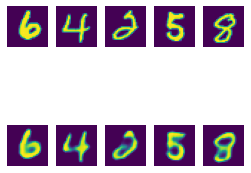

In [41]:
for i, image_idx in enumerate(random_test):
    #랜덤으로 뽑은 이미지를 차례로 나열
    ax = plt.subplot(2,7, i+1)
    #테스트할 이미지를 먼저 그대로 보여줌
    plt.imshow(X_test[image_idx].reshape(28,28))
    ax.axis('off')
    ax = plt.subplot(2,7,7+i+1)
    #오토인코딩 결과를 다음열에 입력
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    ax.axis('off')

plt.show()